In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import os


In [6]:
pwd()

'C:\\Users\\kandanulus\\MyTestlab'

In [7]:
os.chdir('C:\\Users\\kandanulus\\MyTestlab\\DPL\\Lesson7\\NSE-TATAGLOBAL')

In [8]:
data_train=pd.read_csv('NSE-TATAGLOBAL.csv')

In [9]:
pwd()

'C:\\Users\\kandanulus\\MyTestlab\\DPL\\Lesson7\\NSE-TATAGLOBAL'

In [10]:
data_train

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [14]:
data_train.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [15]:
training_set=data_train.iloc[:,1:2].values

In [13]:
# Data processing
# scale data in 0-1
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
training_set_scaled=sc.fit_transform(training_set)

In [46]:
training_set_scaled

array([[0.6202352 ],
       [0.62226277],
       [0.64436334],
       ...,
       [0.16504461],
       [0.15896188],
       [0.16626115]])

In [51]:
# Data prepare
X_train=[]
y_train=[]
for i in range(60,2035):
    X_train.append(training_set_scaled[i-60:i,0]) # 0 to 60 ---0-59,1-61
    y_train.append(training_set_scaled[i,0]) # 60,61
X_train,y_train=np.array(X_train),np.array(y_train)    

In [43]:
X_train.shape

(1975, 60)

In [53]:
y_train.shape

(1975,)

In [49]:
# LSTM require always 3-D data
#Reshape
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [50]:
X_train.shape

(1975, 60, 1)

In [55]:
#Build the LSTM
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [57]:
model=Sequential()
#Add first LSTM Layer
model=Sequential()
# Add first LSTM Layer
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))
# Add second LSTM Layer
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
# Add third LSTM Layer
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
# Add fourth LSTM Layer
model.add(LSTM(units=50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units=1))

In [58]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_4 (LSTM)               (None, 50)               

In [63]:
# Compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [64]:
#Run the model
model.fit(X_train,y_train, epochs=10)

Epoch 1/10
62/62 [==============================] - 20s 124ms/step - loss: 0.0105
Epoch 2/10
62/62 [==============================] - 7s 117ms/step - loss: 0.0030
Epoch 3/10
62/62 [==============================] - 8s 134ms/step - loss: 0.0027
Epoch 4/10
62/62 [==============================] - 8s 128ms/step - loss: 0.0025
Epoch 5/10
62/62 [==============================] - 9s 138ms/step - loss: 0.0025
Epoch 6/10
62/62 [==============================] - 9s 145ms/step - loss: 0.0025
Epoch 7/10
62/62 [==============================] - 8s 136ms/step - loss: 0.0022
Epoch 8/10
62/62 [==============================] - 9s 143ms/step - loss: 0.0024
Epoch 9/10
62/62 [==============================] - 9s 146ms/step - loss: 0.0020
Epoch 10/10
62/62 [==============================] - 9s 146ms/step - loss: 0.0019


In [3]:
# Make the Prediction and will visualize the result
data_test=pd.read_csv('tatatest.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'tatatest.csv'

In [67]:
os.chdir('C:\\Users\\kandanulus\\MyTestlab\\DPL\\Lesson7\\tatatest')

In [68]:
data_test=pd.read_csv('tatatest.csv')

In [70]:
data_test

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-24,220.10,221.25,217.05,219.55,219.80,2171956,4771.34
1,2018-10-23,221.10,222.20,214.75,219.55,218.30,1416279,3092.15
2,2018-10-22,229.45,231.60,222.00,223.05,223.25,3529711,8028.37
3,2018-10-19,230.30,232.70,225.50,227.75,227.20,1527904,3490.78
4,2018-10-17,237.70,240.80,229.45,231.30,231.10,2945914,6961.65
5,2018-10-16,237.10,237.70,233.05,234.40,235.45,1723113,4052.25
6,2018-10-15,229.70,237.00,226.80,234.80,234.90,1224339,2845.68
7,2018-10-12,226.25,232.35,225.50,228.70,229.10,1165527,2675.91
8,2018-10-11,215.00,229.70,215.00,225.60,224.60,1293881,2890.85
9,2018-10-10,215.00,229.65,215.00,228.25,228.40,2919278,6557.95


In [73]:
data_test.shape()

TypeError: 'tuple' object is not callable

In [74]:
test_set=data_test.iloc[:,1:2].values

In [75]:
test_set

array([[220.1 ],
       [221.1 ],
       [229.45],
       [230.3 ],
       [237.7 ],
       [237.1 ],
       [229.7 ],
       [226.25],
       [215.  ],
       [215.  ],
       [215.5 ],
       [208.  ],
       [217.  ],
       [223.5 ],
       [230.  ],
       [234.55]])

In [81]:
#Concat/Mege the training&test data
dataset_total=pd.concat((data_train['Open'],data_test['Open']),axis=0)

In [79]:
dataset_total.shape

(2051,)

In [86]:
len(dataset_total) - len(data_test) - 60

1975

In [87]:
dataset_total[1975:].values

array([131.9 , 134.5 , 134.5 , 134.75, 130.1 , 128.  , 125.  , 124.4 ,
       121.3 , 122.3 , 123.3 , 124.6 , 126.35, 123.45, 121.6 , 123.  ,
       124.55, 122.5 , 122.8 , 124.  , 124.85, 126.15, 128.5 , 127.7 ,
       128.  , 124.  , 123.25, 122.5 , 124.2 , 121.65, 117.  , 118.8 ,
       119.  , 118.2 , 116.  , 118.45, 114.  , 112.  , 110.  , 110.15,
       111.9 , 115.95, 113.4 , 113.  , 113.75, 112.9 , 112.  , 114.1 ,
       117.  , 118.5 , 118.3 , 117.3 , 116.5 , 112.5 , 118.  , 117.6 ,
       120.1 , 121.8 , 120.3 , 122.1 , 220.1 , 221.1 , 229.45, 230.3 ,
       237.7 , 237.1 , 229.7 , 226.25, 215.  , 215.  , 215.5 , 208.  ,
       217.  , 223.5 , 230.  , 234.55])

In [84]:
inputs = dataset_total[len(dataset_total) - len(data_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [85]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 3s 3s/step


In [88]:
predicted_stock_price

array([[112.50956],
       [113.73567],
       [116.58756],
       [121.76174],
       [129.5814 ],
       [139.9942 ],
       [152.53932],
       [166.35605],
       [180.37605],
       [193.4458 ],
       [204.62933],
       [213.34618],
       [219.30179],
       [222.60979],
       [223.69043],
       [223.14963]], dtype=float32)

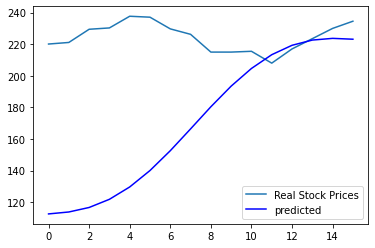

In [90]:
# visualize the data
plt.plot(test_set,label='Real Stock Prices')
plt.plot(predicted_stock_price,color='blue',label='predicted')
plt.legend()
plt.show()